# With sWeights: `common_B0toDstDs_Dst_constr_mu2Free`
# Without sWeights: `common_Dst_constr_B0toDstDsWithmu2Free`
# Fit the complete data (With sWeights and without sWeights)
- Fit on $m(B^0_s)$ with $m(3\pi)$ around $m(D_s)$ and sWeights
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (gaussian)
    - Background of partially reconstructed decays (gaussian)
    - Combinatorial background (exponential)
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (sum of two Crystall ball PDF)
        - **FINAL CHOICE: $\alpha_L$, $\alpha_R$, $n_L$ free, $n_R$ fixed**
    - Background $B^0 \to D^{*-} D_s^+$ from the other fit of the simultaneous fit
    - Background with a misidentified pion: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$ (sum of two crystall ball PDF)
    - Combinatorial background (exponential)

Those two fits are not simultaneous

## Import

In [1]:
import zfit
import timeit
import pandas as pd


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, load_saved_root, add_constr_Dst, json_to_latex_table, retrieve_params
from plot.fit import plot_hist_fit_particle
import plot.histogram as h
from fit import launch_fit, define_zparams, save_params, sum_crystalball
from variables import name_params, name_params_B0toDstDs

Welcome to JupyROOT 6.22/02


In [2]:
name_data = 'common_Dst_constr_B0toDstDsWithmu2Free'
name_data_B0toDstDs = 'common_B0toDstDs_Dst_constr_mu2Free'
name_data_Dstto3pi = 'common_Dstto3pi' # same as sWeights as the unconstrained case

name_data_MC = 'MC_constr_opposedCB_sharedMean'
name_data_KPiPi = "data_KPiPi_constr"


name_dataHEP = 'common_Dst_constr_B0toDstDsWithmu2FreeHEP'
name_data_B0toDstDsHEP = 'common_B0toDstDs_Dst_constr_mu2FreeHEP'
name_data_Dstto3piHEP = 'common_Dstto3piHEP'

## Load

In [3]:
df = load_data(years, magnets, type_data='common', vars=['B0_M','tau_M', 'Dst_M'],
                            cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


In [4]:
# Mean of the distribution of the partially reconstructed data
#Only used as a starting value
mu2_p = retrieve_params('all_data_strip', name_folder='data_strip_p')['mu2']

Constrained data

In [5]:
df = add_constr_Dst(df)
var = 'Dst_constr_B0_M'

## Fit on weighted `B0_M` with `|tau_M-1969|<50`

### Data

In [6]:
size_tau_M = 50.
mean_tau_M = 1969.
low_tau_M = mean_tau_M - size_tau_M
high_tau_M = mean_tau_M + size_tau_M

df_Ds = df.query(f"abs(tau_M-{mean_tau_M})<={size_tau_M}")

In [7]:
low_B0Ds = 5150.
high_B0Ds = 5360.
weights = load_saved_root(name_data_Dstto3pi, ['sWeight'], name_folder='common')['sWeight']
weightsHEP = load_saved_root(name_data_Dstto3piHEP, ['sWeight'], name_folder='common')['sWeight']

/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_Dstto3pi.root
/afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_Dstto3piHEP.root


### Distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:55: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_B0toDstDs_Dst_constr_mu2Free


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:55: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_common_B0toDstDs_Dst_constr_mu2Free


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>)

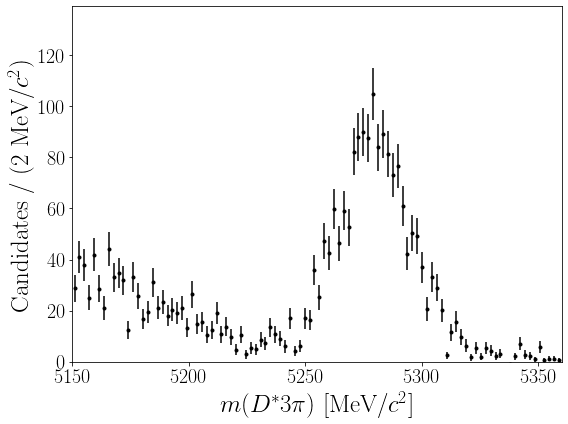

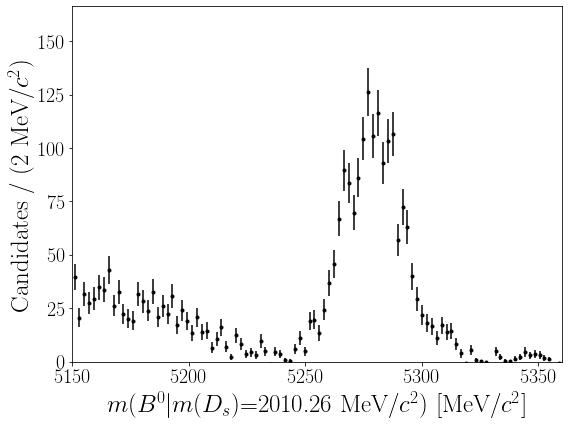

In [8]:
h.plot_hist_particle({name_data_B0toDstDs:df_Ds},'B0_M',
              low = low_B0Ds, high = high_B0Ds,
              n_bins = 100, mode_hist = False, colors='black', weights=weights)
h.plot_hist_particle({name_data_B0toDstDs:df_Ds}, var,
              low = low_B0Ds, high = high_B0Ds,
              n_bins = 100, mode_hist = False, colors='black', weights=weights)


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:55: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0toDstDs_Dst_constr_mu2Free


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Proportion of candidates / (2 MeV/$c^2$)'>)

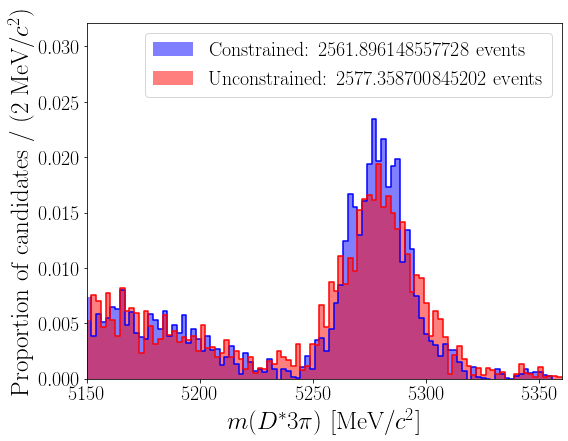

In [9]:
df_constr = pd.DataFrame()
df_constr['B0_M'] = df_Ds[var]
h.plot_hist_particle({'Constrained':df_constr, 'Unconstrained':df_Ds}, 'B0_M',
              low = low_B0Ds, high = high_B0Ds, name_file=name_data_B0toDstDs,
              n_bins = 100, mode_hist = True, colors=['blue', 'red'], weights=weights)

#### Distribution HEP

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:55: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_common_B0toDstDs_Dst_constr_mu2FreeHEP
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_common_B0toDstDs_Dst_constr_mu2Free


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>)

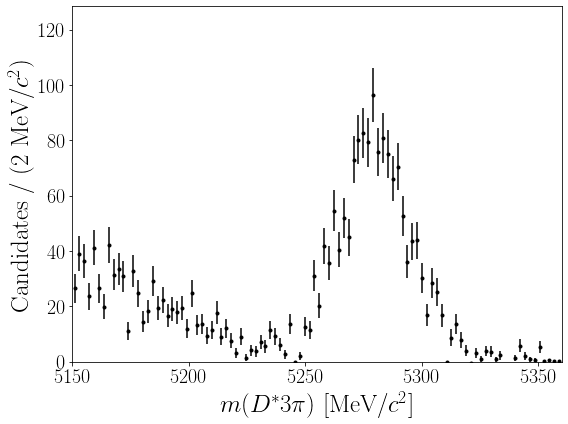

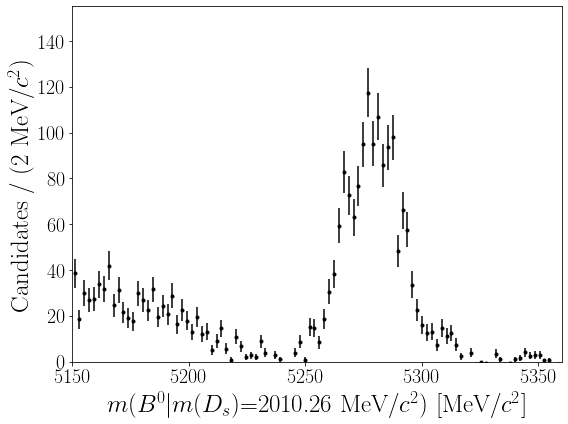

In [17]:
h.plot_hist_particle({name_data_B0toDstDsHEP:df_Ds},'B0_M',
              low = low_B0Ds, high = high_B0Ds,
              n_bins = 100, mode_hist = False, colors='black', weights=weightsHEP)
h.plot_hist_particle({name_data_B0toDstDs:df_Ds}, var,
              low = low_B0Ds, high = high_B0Ds,
              n_bins = 100, mode_hist = False, colors='black', weights=weightsHEP)


### Starting values

In [10]:
n_events_B0Ds = len(df_Ds.query(f'B0_M > {low_B0Ds} and B0_M < {high_B0Ds}'))

n_sig_k = 1600
n_bkg_k = 200
n_bkg2_k = 800

initial_values_B0Ds = {
    # Signal
    'mu_B0Ds'       :{ 'value': 5279.                         , 'low': 5279.-4.       , 'high': 5279.+4.             , 'floating': True},
    'sigma_B0Ds'    :{ 'value': 15.                           , 'low': 15.-5.        , 'high': 15.+5.                , 'floating': True},
    'n_sig_B0Ds'    :{ 'value': n_sig_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
    # Combinatorial background
    'lambda_B0Ds'   :{ 'value': -0.000001                     , 'low': -0.1           , 'high': -0.00000000000000001 , 'floating': True},
    'n_bkg_B0Ds'    :{ 'value': n_bkg_k                       , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
    # Partially reconstructed particles
    'mu2_B0Ds'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5200.                , 'floating': True},
    'sigma2_B0Ds'   :{ 'value': 80.                           , 'low': 10.            , 'high': 90.                  , 'floating': True},
    'n_bkg2_B0Ds'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0Ds        , 'floating': True},
}

### Observables and variables

In [11]:
obs_B0Ds = zfit.Space("x", limits=(low_B0Ds, high_B0Ds))

zparams_B0Ds = define_zparams(initial_values_B0Ds)

### PDFs

In [12]:
gaussianS_B0Ds = zfit.pdf.Gauss(zparams_B0Ds['mu_B0Ds'],zparams_B0Ds['sigma_B0Ds'],obs=obs_B0Ds)
exponential_B0Ds = zfit.pdf.Exponential(zparams_B0Ds['lambda_B0Ds'], obs=obs_B0Ds)
gaussian_B0Ds = zfit.pdf.Gauss(zparams_B0Ds['mu2_B0Ds'],zparams_B0Ds['sigma2_B0Ds'],obs=obs_B0Ds)

gaussianS_B0Ds_ext = gaussianS_B0Ds.create_extended(zparams_B0Ds['n_sig_B0Ds'])
exponential_B0Ds_ext = exponential_B0Ds.create_extended(zparams_B0Ds['n_bkg_B0Ds'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams_B0Ds['n_bkg2_B0Ds'])

model_B0Ds = zfit.pdf.SumPDF([gaussianS_B0Ds_ext, exponential_B0Ds_ext, gaussian_B0Ds_ext])
data_B0Ds = zfit.Data.from_pandas(df_Ds['B0_M'], obs=obs_B0Ds, weights=weights)

data_B0DsHEP = zfit.Data.from_pandas(df_Ds['B0_M'], obs=obs_B0Ds, weights=weightsHEP)

### Fitting

In [17]:
start = timeit.default_timer()
result_B0Ds, params_B0Ds = launch_fit( model_B0Ds, data_B0Ds, extended=True)
result_B0Ds, params_B0Ds = launch_fit( model_B0Ds, data_B0Ds, extended=True)
stop = timeit.default_timer()
print('Time to do the fit: ', stop - start) 

------------------------------------------------------------------
| FCN = -4941                   |     Ncalls=759 (759 total)     |
| EDM = 0.000106 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:46: ExperimentalFeatureWarning: The computation of the covariance matrix with weights is still experimental.
  ExperimentalFeatureWarning)


name             value    minuit_hesse    at limit
-----------  ---------  --------------  ----------
n_sig_B0Ds        1582     +/-      57       False
n_bkg_B0Ds       299.5     +/- 2.1e+02       False
n_bkg2_B0Ds        696     +/- 1.7e+02       False
mu_B0Ds           5280     +/-     0.6       False
sigma_B0Ds       15.43     +/-     0.6       False
lambda_B0Ds  -0.003742     +/-   0.007       False
mu2_B0Ds          5150     +/-      10       False
sigma2_B0Ds      39.62     +/-     6.3       False
------------------------------------------------------------------
| FCN = -4941                   |     Ncalls=114 (114 total)     |
| EDM = 0.000108 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
---------------------

Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.00127083
Info in Required Edm is : edmval = 0.001


### Plotting and saving

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:503: UserWarning: The function <function Space.limits at 0x7f7551036710> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5360.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:50: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:32: UserWarning: The function <function Space.area at 0x7f755103bb00> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5360.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test i

Number of d.o.f. in the model:  8
Reduced chi2:  2.3254629988057416


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


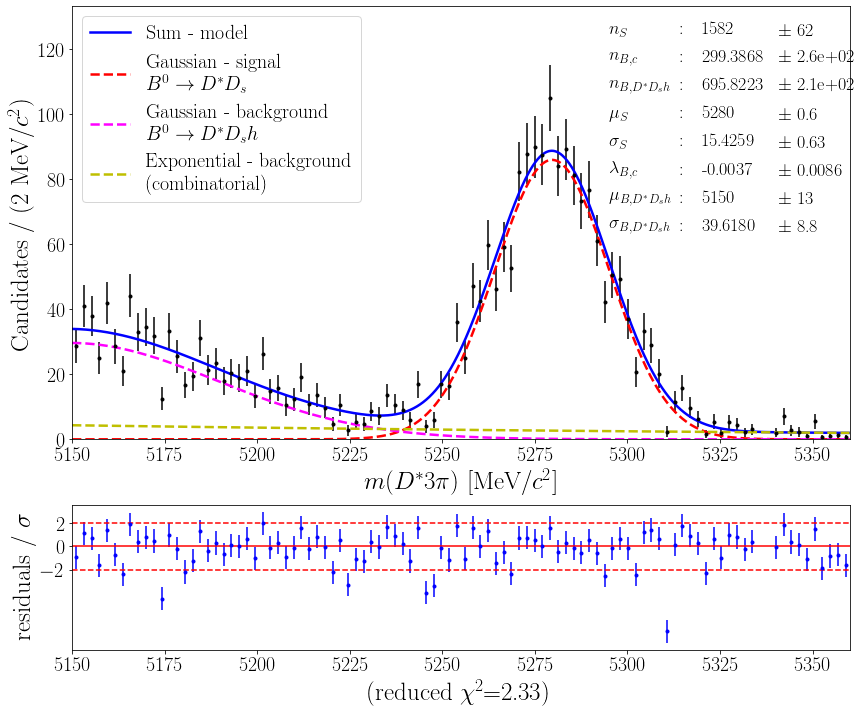

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free/B0_M_common_B0toDstDs_Dst_constr_mu2Free_details_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=2.33)', ylabel='residuals / $\\sigma$'>)

In [12]:
plot_hist_fit_particle(df_Ds,'B0_M', models = [model_B0Ds, gaussianS_B0Ds_ext, gaussian_B0Ds_ext, exponential_B0Ds_ext],
                       name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                      '\n (combinatorial)'],
                       obs=obs_B0Ds, n_bins = 100,mode_hist = False,
                       name_data=name_data_B0toDstDs+'_details', name_folder=name_data,
                       colors=['b','r','magenta','y'], weights=weights,
                       params=params_B0Ds,name_params=name_params_B0toDstDs,
                       colWidths=[0.05,0.01,0.05,0.04], show_chi2=True,
                       fontsize_res = 18.,
                       fontsize_leg=20)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:50: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Number of d.o.f. in the model:  8
Reduced chi2:  1.1118272516999401


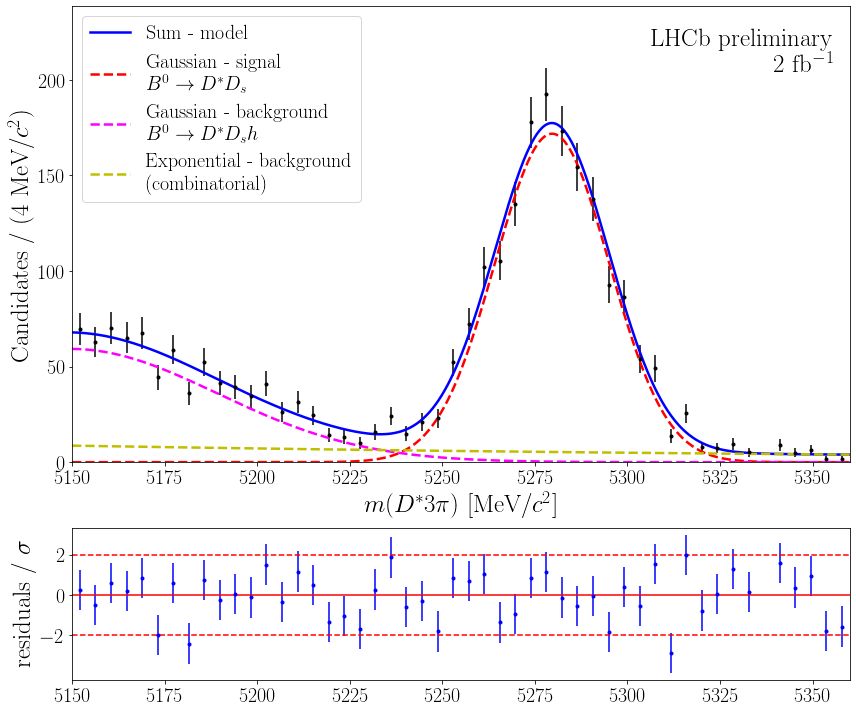

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free/B0_M_common_B0toDstDs_Dst_constr_mu2Free_50_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

In [13]:
plot_hist_fit_particle(df_Ds,'B0_M', models = [model_B0Ds, gaussianS_B0Ds_ext, gaussian_B0Ds_ext, exponential_B0Ds_ext],
                       name_models = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                      '\n (combinatorial)'],
                       obs=obs_B0Ds, n_bins = 50,mode_hist = False,
                       name_data = name_data_B0toDstDs+'_50', name_folder=name_data,
                       colors=['b','r','magenta','y'], weights=weights,
                       fontsize_res = 18., pos_text_LHC='right',
                       fontsize_leg=20)

In [17]:
save_params(params_B0Ds, name_data_B0toDstDs, True, name_folder=name_data_B0toDstDs)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_B0toDstDs_Dst_constr_mu2Free/common_B0toDstDs_Dst_constr_mu2Free_params.json


In [18]:
json_to_latex_table(name_data_B0toDstDs, name_data_B0toDstDs, name_params_B0toDstDs)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_B0toDstDs_Dst_constr_mu2Free/common_B0toDstDs_Dst_constr_mu2Free_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{B,c}$&$-0.0037\pm0.0086$\\
\hline
$\mu_{B, D^* D_s h}$&$5150\pm13$\\
\hline
$\mu_S$&$5279.63\pm0.60$\\
\hline
$n_{B, D^* D_s h}$&$(7.0\pm2.1)\times 10^2$\\
\hline
$n_{B,c}$&$(3.0\pm2.6)\times 10^2$\\
\hline
$n_S$&$1582\pm62$\\
\hline
$\sigma_{B, D^* D_s h}$&$39.6\pm8.8$\\
\hline
$\sigma_S$&$15.43\pm0.63$\\
\hline
\end{tabular}


## Fit on the full `B0_M`

In [6]:
low = 5150.
high = 5545.

### Data

In [7]:
data_KPiPi_params = retrieve_params(name_data_KPiPi, name_folder='data_KPiPi') # already in MeV   
data_B0Ds_params = retrieve_params(name_data_B0toDstDs, name_folder=name_data_B0toDstDs)   
MC_param_results = retrieve_params(name_data_MC, name_folder='MC') 

### Distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_common_Dst_constr_B0toDstDsWithmu2Free


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>)

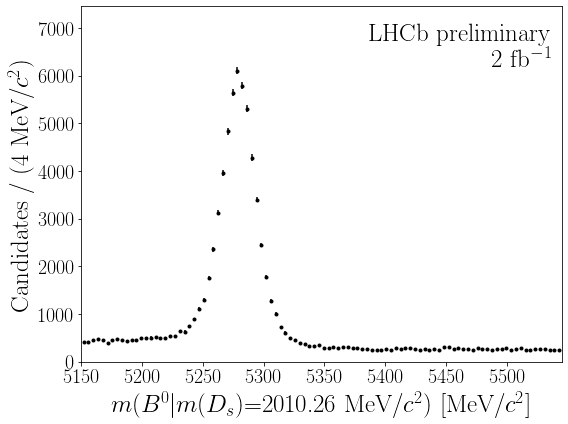

In [8]:
h.plot_hist_particle({name_data:df}, var,
              low = low, high = high,
              n_bins = 100, mode_hist = False, colors='black', pos_text_LHC='right')

### Initial values

In [9]:
data_B0Ds_params

{'lambda_B0Ds': -0.003743318445264099,
 'lambda_B0Ds_err': 0.008618329956887459,
 'mu2_B0Ds': 5149.667224619046,
 'mu2_B0Ds_err': 12.835664426388938,
 'mu_B0Ds': 5279.634237543429,
 'mu_B0Ds_err': 0.6029160112628024,
 'n_bkg2_B0Ds': 695.8222672981723,
 'n_bkg2_B0Ds_err': 214.2075041976321,
 'n_bkg_B0Ds': 299.38677982802693,
 'n_bkg_B0Ds_err': 259.75909986535413,
 'n_sig_B0Ds': 1582.0927393505024,
 'n_sig_B0Ds_err': 62.172509943178255,
 'sigma2_B0Ds': 39.61804305131761,
 'sigma2_B0Ds_err': 8.786418674804477,
 'sigma_B0Ds': 15.425942680179407,
 'sigma_B0Ds_err': 0.6266191529462425}

In [10]:
n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))


## common_Dst_constr_B0toDstDsWithmu2Free
# n_sig        54390     +/- 1.3e+03       False
# r_bkgK     0.03491     +/-   0.016       False
# n_bkg        27260     +/- 6.7e+02       False
# frac        0.4724     +/-   0.041       False
# alphaL       2.029     +/-    0.11       False
# mu            5279     +/-   0.093       False
# nL           0.443     +/-    0.14       False
# sigmaL       11.11     +/-    0.34       False
# alphaR      -1.763     +/-    0.13       False
# sigmaR       18.89     +/-    0.63       False
# lambda  -0.0003194     +/- 0.00019       False
# nR fixed
n_sig_k = 54000
n_bkg_k = 27000
r_bkgK_k = 0.03
initial_values = {
    # Signal        
    'mu'       :{ 'value': 5279.                         , 'low': 5279.-3.       , 'high': 5279.+3.             , 'floating': True},
    'sigmaL'   :{ 'value': 11.                           , 'low': 5.             , 'high': 15.                  , 'floating': True},
    'sigmaR'   :{ 'value': 19.                           , 'low': 15.            , 'high': 25.                  , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': True},
    'alphaR'   :{ 'value': MC_param_results['alphaR_MC'] , 'low': -10.           , 'high': -0.1                 , 'floating': True},
    'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 10.                  , 'floating': True},
    'nR'       :{ 'value': MC_param_results['nR_MC']      , 'low': 1.             , 'high': 70.                 , 'floating': False},
    'frac'     :{ 'value': 0.5                           , 'low': 0.1            , 'high': 1.                   , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Combinatorial background        
    'lambda'   :{ 'value': -0.00003                      , 'low': -0.001         , 'high': -0.000001            , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Background decay D*Kpipi    
    'r_bkgK'   :{ 'value': r_bkgK_k                      , 'low': 0.0001          , 'high': 0.08                , 'floating': True},
}



## common_B0toDstDs_Dst_constr
# # nR fixed
# n_sig_k = 57000
# n_bkg_k = 26000
# r_bkgK_k = 0.03
# initial_values = {
#     # Signal        
#     'mu'       :{ 'value': 5279.                         , 'low': 5279.-3.       , 'high': 5279.+3.             , 'floating': True},
#     'sigmaL'   :{ 'value': 11.                           , 'low': 5.             , 'high': 15.                  , 'floating': True},
#     'sigmaR'   :{ 'value': 19.                           , 'low': 15.            , 'high': 25.                  , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': True},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'] , 'low': -10.           , 'high': -0.1                 , 'floating': True},
#     'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 10.                  , 'floating': True},
#     'nR'       :{ 'value': MC_param_results['nR_MC']      , 'low': 1.             , 'high': 70.                 , 'floating': False},
#     'frac'     :{ 'value': 0.5                           , 'low': 0.1            , 'high': 1.                   , 'floating': True},
#     'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
#     # Combinatorial background        
#     'lambda'   :{ 'value': -0.00004                      , 'low': -0.001         , 'high': -0.00000001          , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
#     # Background decay D*Kpipi    
#     'r_bkgK'   :{ 'value': r_bkgK_k                      , 'low': 0.0001          , 'high': 0.08                , 'floating': True},
# }

for variable in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    initial_values[f'{variable}_K'] = {'value': data_KPiPi_params[variable], 'low': None, 'high': None, 'floating': False}

for variable in 'mu', 'sigma', 'n_sig' :
    initial_values[f'{variable}_DsB0'] = {'value': data_B0Ds_params[f'{variable}_B0Ds'], 'low': None, 'high': None, 'floating': False}

### Observables and variables

In [11]:
obs = zfit.Space("x", limits=(low, high))

zparams = define_zparams(initial_values)

# Composed parameter
mult = lambda r, n: r*n
zparams["n_bkgK"] = zfit.ComposedParameter("n_bkgK", mult, params=[zparams['r_bkgK'],zparams['n_sig']])

### PDFs

In [12]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                          zparams['sigmaL'], zparams['sigmaR'],
                                                          zparams['frac'], obs,                                                          
                                                          zparams['alphaL'], zparams['alphaR'], 
                                                          zparams['nL'], zparams['nR']
                                                         )


gaussian_B0Ds = zfit.pdf.Gauss(zparams['mu_DsB0'],zparams['sigma_DsB0'],obs=obs)

model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                          zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                          zparams['fraction_K'], obs,
                                                          zparams['alphaL_K'], zparams['alphaR_K'], 
                                                          zparams['nL_K'], zparams['nR_K'])

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)


model_S_ext = model_S.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams['n_sig_DsB0'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, model_K_ext, exp_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df[var], obs=obs)

### Fit

In [13]:
import timeit
start = timeit.default_timer()
result, params = launch_fit(model, data, extended=True)
result, params = launch_fit(model, data, extended=True)
result, params = launch_fit(model, data, extended=True)
stop = timeit.default_timer()
print('Time to do the fit: ', stop - start) 

------------------------------------------------------------------
| FCN = -4.312e+05              |     Ncalls=923 (923 total)     |
| EDM = 0.000465 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse    at limit
------  ----------  --------------  ----------
n_sig        54410     +/- 1.3e+03       False
r_bkgK     0.03479     +/-   0.016       False
n_bkg   

**All free**: unstable

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:511: UserWarning: The function <function Space.limits at 0x7f73f6c5f680> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:34: UserWarning: The function <function Space.area at 0x7f73f6c64a70> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  11
Reduced chi2:  1.2205300426517312


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free/Dst_constr_B0_M_common_Dst_constr_B0toDstDsWithmu2Free_details_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=1.22)', ylabel='residuals / $\\sigma$'>)

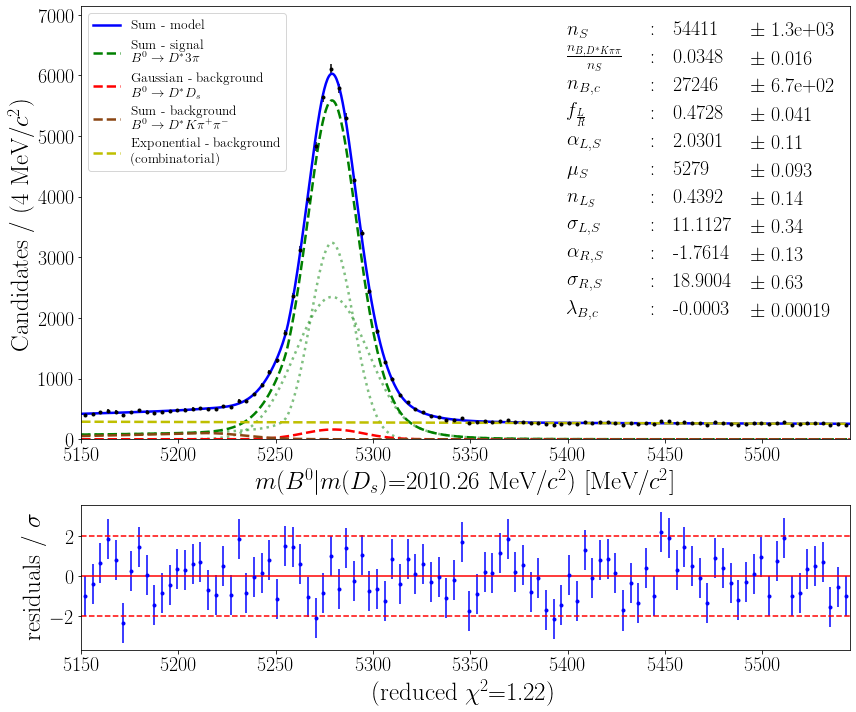

In [14]:
name_data_plot = name_data + '_details'
plot_hist_fit_particle(df, var, models = [model,[model_S_ext, crystalBallL_S, crystalBallR_S], gaussian_B0Ds_ext, model_K_ext,exp_ext],
                       name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data_plot, name_folder=name_data,
                       colors=['b','g','r','saddlebrown','y'],
                        params=params,name_params=name_params,
                       fontsize_leg=13.5, show_chi2=True,
                       colWidths=[0.06,0.01,0.05,0.06], 
                      )


Number of d.o.f. in the model:  11
Reduced chi2:  1.2205300426517312


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr_B0toDstDsWithmu2Free/Dst_constr_B0_M_common_Dst_constr_B0toDstDsWithmu2Free_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

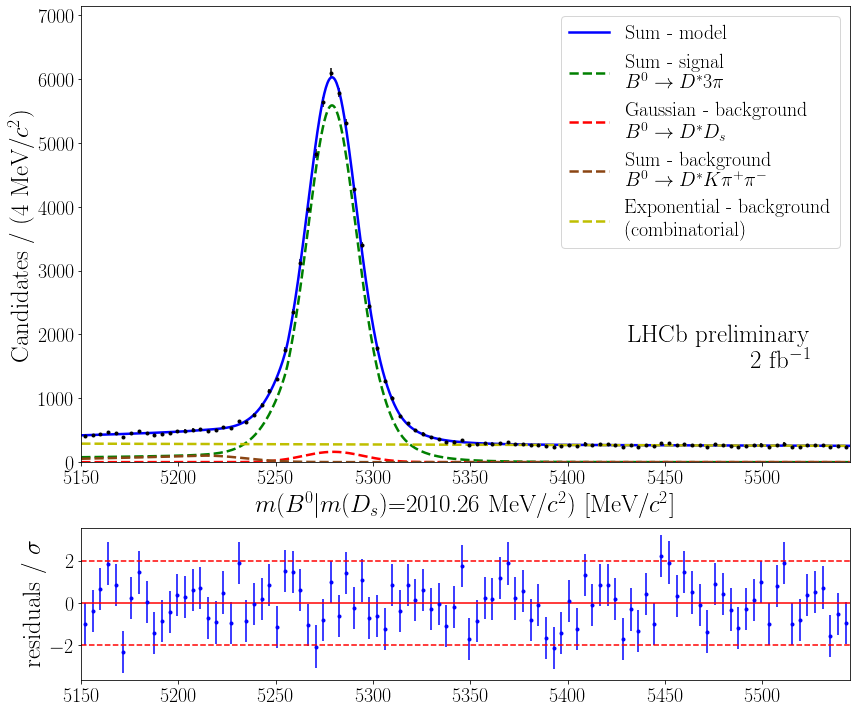

In [15]:
name_data_plot = name_data
plot_hist_fit_particle(df,var, models = [model,model_S_ext, gaussian_B0Ds_ext, model_K_ext,exp_ext],
                       name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data_plot, name_folder=name_data,
                       colors=['b','g','r','saddlebrown','y'], loc_leg='best',
                       fontsize_leg=20., pos_text_LHC=[0.95, 0.30, 'right'],
                      )

In [15]:
save_params(params,name_data, True, name_folder=name_data)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dst_constr_B0toDstDsWithmu2Free/common_Dst_constr_B0toDstDsWithmu2Free_params.json


In [16]:
json_to_latex_table(name_data, name_data, name_params)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_Dst_constr_B0toDstDsWithmu2Free/common_Dst_constr_B0toDstDsWithmu2Free_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\alpha_{L_S}$&$2.03\pm0.11$\\
\hline
$\alpha_{R_S}$&$-1.76\pm0.13$\\
\hline
$f_{\frac{L}{R}}$&$0.473\pm0.041$\\
\hline
$\lambda_{B,c}$&$-0.00031\pm0.00019$\\
\hline
$\mu_S$&$5278.903\pm0.093$\\
\hline
$n_{L_S}$&$0.44\pm0.14$\\
\hline
$n_{B,c}$&$(2.725\pm0.067)\times 10^4$\\
\hline
$n_S$&$(5.44\pm0.13)\times 10^4$\\
\hline
$\frac{n_{B,D^*K\pi\pi}}{n_S}$&$0.035\pm0.016$\\
\hline
$\sigma_{L_S}$&$11.11\pm0.34$\\
\hline
$\sigma_{R_S}$&$18.90\pm0.63$\\
\hline
\end{tabular}


In [3]:
fitted_params = retrieve_params(name_data, name_folder=name_data)

In [4]:
fitted_params_Ds = retrieve_params(name_data_B0toDstDs, name_folder=name_data_B0toDstDs)

In [5]:
fitted_params

{'alphaL': 2.030074578321816,
 'alphaL_err': 0.1119464815620382,
 'alphaR': -1.7613550245501948,
 'alphaR_err': 0.12983308451462405,
 'frac': 0.47277808511543173,
 'frac_err': 0.04069677810665779,
 'lambda': -0.00031487842295881184,
 'lambda_err': 0.00019016389584980648,
 'mu': 5278.90284703447,
 'mu_err': 0.09271311767994285,
 'nL': 0.4392329990731146,
 'nL_err': 0.13566845182217388,
 'n_bkg': 27246.091123210226,
 'n_bkg_err': 666.763226276885,
 'n_sig': 54410.9804154085,
 'n_sig_err': 1270.8636362194927,
 'r_bkgK': 0.03478781022148211,
 'r_bkgK_err': 0.015797304019229366,
 'sigmaL': 11.112693468645325,
 'sigmaL_err': 0.3362170958580714,
 'sigmaR': 18.900390558468914,
 'sigmaR_err': 0.625500847256154}

In [6]:
fitted_params_Ds

{'lambda_B0Ds': -0.003743318445264099,
 'lambda_B0Ds_err': 0.008618329956887459,
 'mu2_B0Ds': 5149.667224619046,
 'mu2_B0Ds_err': 12.835664426388938,
 'mu_B0Ds': 5279.634237543429,
 'mu_B0Ds_err': 0.6029160112628024,
 'n_bkg2_B0Ds': 695.8222672981723,
 'n_bkg2_B0Ds_err': 214.2075041976321,
 'n_bkg_B0Ds': 299.38677982802693,
 'n_bkg_B0Ds_err': 259.75909986535413,
 'n_sig_B0Ds': 1582.0927393505024,
 'n_sig_B0Ds_err': 62.172509943178255,
 'sigma2_B0Ds': 39.61804305131761,
 'sigma2_B0Ds_err': 8.786418674804477,
 'sigma_B0Ds': 15.425942680179407,
 'sigma_B0Ds_err': 0.6266191529462425}

### Compute the misidentified $K$ rate

$$\mathcal{B}\left(B^0 \to D^{*-} \pi^+ \pi^- \pi^-\right) = (7.21 \pm 0.29)\times 10^{-3}$$
$$\mathcal{B}\left(B^0 \to D^{*-} K^+ \pi^- \pi^-\right) = (4.7 \pm 0.4)\times 10^{-4}$$


In [5]:
from uncertainties import ufloat

In [13]:
normal_mode_br = ufloat(7.21e-3, 0.29e-3)
bkgK_br = ufloat(4.7e-4, 0.4e-4)
print(bkgK_br/normal_mode_br)

0.065+/-0.006


In [32]:
r_bkgK = ufloat(fitted_params['r_bkgK'],fitted_params['r_bkgK_err'])
print(r_bkgK)

0.035+/-0.016


In [14]:
r_bkgK/(bkgK_br/normal_mode_br)

0.5336598121210341+/-0.24748923017071864

### Compare $B^0 \to D^* D_s$ and $B^0 \to D^* (D_s \to 3\pi)$
$$\mathcal{B}\left(B^0 \to D^{*-} D_s \right) = (1.77 \pm 0.14)\times 10^{-2}$$
$$\mathcal{B}\left(D_{s}^+ \to \pi^+ \pi^+ \pi^- \right) = (1.08 \pm 0.04)\times 10^{-2}$$

In [28]:
bkgDs_br = ufloat(1.77e-2, 0.14e-2)*ufloat(1.08e-2, 0.04e-2)
print(bkgDs_br/normal_mode_br)
r_br_Ds = bkgDs_br/normal_mode_br

0.0265+/-0.0025


In [23]:
n_bkgDs = ufloat(fitted_params_Ds['n_sig_B0Ds'], fitted_params_Ds['n_sig_B0Ds_err'])

In [25]:
n_normal_mode = ufloat(fitted_params['n_sig'],fitted_params['n_sig_err'])

In [27]:
r_bkgDs = n_bkgDs/n_normal_mode
print(r_bkgDs)

0.0291+/-0.0013


In [30]:
print(r_bkgDs/r_br_Ds)

1.10+/-0.12


### Compute cross section